In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
from statistics import mode
import graphviz 
#from sklearn.tree import export_graphviz
#from sklearn import tree
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\Muskaan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
train1= pd.read_csv('C:\\Users\Muskaan\Desktop\Muskaan\Great Lakes\Clustering- Supervised Learning\Citi Bank- Kaggle Competition\Data\\train1.csv')

In [7]:
train2= pd.read_csv('C:\\Users\Muskaan\Desktop\Muskaan\Great Lakes\Clustering- Supervised Learning\Citi Bank- Kaggle Competition\Data\\train2.csv')

In [8]:
train3= pd.read_csv('C:\\Users\Muskaan\Desktop\Muskaan\Great Lakes\Clustering- Supervised Learning\Citi Bank- Kaggle Competition\Data\\train3.csv')

In [9]:
train1.head(2)

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0


In [10]:
train2.head(2)

,Ref.No,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,2,2,2,2,43243,42537,41370,40694
1,1288,-2,-2,-2,-1,13780,12242,32463,20621


In [11]:
train3.head(2)

,Ref.No,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,39606,38680,2000,1500,2000,1500,1500,0
1,1288,13711,8294,12300,32520,34,68,8334,45684


In [12]:
train12=pd.merge(train1,train2,how='inner',on='Ref.No')

In [13]:
train12.head(2)

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,X10,X11,X12,X13,X14,X15
0,22203,320000,2,1,2,27,1,2,1,2,2,2,2,43243,42537,41370,40694
1,1288,470000,1,2,1,41,-2,-2,0,-2,-2,-2,-1,13780,12242,32463,20621


In [14]:
train123=pd.merge(train12,train3,how='inner',on='Ref.No')

In [15]:
train123.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y,X8,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,22203,320000,2,1,2,27,1,2,1,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,1288,470000,1,2,1,41,-2,-2,0,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,11822,20000,1,2,2,25,1,2,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,15085,80000,1,3,1,41,0,0,1,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,6192,30000,1,1,2,30,1,-2,1,-2,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#train_complete = train_complete.rename(columns={'Ref.No': 'Ref.No', 'X1': 'Credit_Amt','X2':'Gender','X3':'Education','X4':'Marital_Status','X5':'Age','X6':'Repayment_Status_Sep05','X7':'Repayment_Status_Aug05','Y':'Default_NonDefault','X8':'Repayment_Status_Jul05','X9':'Repayment_Status_Jun05','X10':'Repayment_Status_May05','X11':'Repayment_Status_Apr05','X12','Amt_BillStmt_Sep05','X13':'Amt_BillStmt_Aug05','X14':'Amt_BillStmt_Jul05','X15':'Amt_BillStmt_Jun05','X16':'Amt_BillStmt_May05','X17':'Amt_BillStmt_Apr05','X18':'Amt_Paid_Sep05','X19':'Amt_Paid_Aug05','X20':'Amt_Paid_Jul05','X21':'Amt_Paid_Jun05','X22':'Amt_Paid_May05','X23':'Amt_Paid_Apr05'})

In [17]:
train123.shape

(21600, 25)

In [18]:
train123=train123.drop('Ref.No',axis=1)

In [19]:
train123.head()

,X1,X2,X3,X4,X5,X6,X7,Y,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,320000,2,1,2,27,1,2,1,2,2,...,41370,40694,39606,38680,2000,1500,2000,1500,1500,0
1,470000,1,2,1,41,-2,-2,0,-2,-2,...,32463,20621,13711,8294,12300,32520,34,68,8334,45684
2,20000,1,2,2,25,1,2,0,0,0,...,18921,19297,18926,17717,1264,1249,625,700,1000,1000
3,80000,1,3,1,41,0,0,1,0,0,...,60311,62471,21071,2099,3008,3000,5000,10000,2099,0
4,30000,1,1,2,30,1,-2,1,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
train123.shape

(21600, 24)

In [21]:
x= train123.drop('Y',axis=1)
y= train123['Y']

In [22]:
x_standardize = x.apply(zscore)

In [23]:
from sklearn.cross_validation import train_test_split
test_size = 0.30 # taking 70:30 training and test set
seed = 0  # Random numbmer seeding for reapeatability of the code
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=test_size, random_state=seed)

In [24]:
#from sklearn.preprocessing import StandardScaler
#independent_scalar = StandardScaler()
#x_train = independent_scalar.fit_transform (x_train) #fit and transform
#x_validate = independent_scalar.transform (x_validate) # only transform

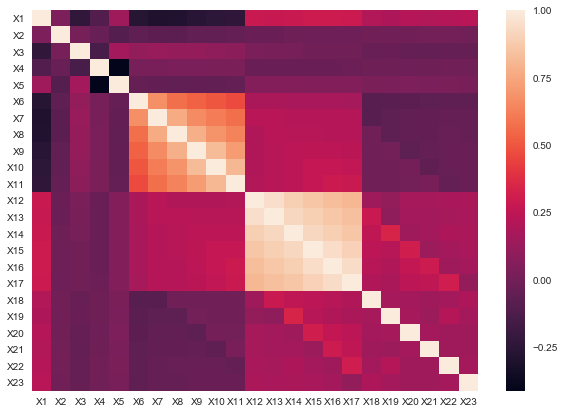

In [37]:
import seaborn as sns
corr = x_standardize.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

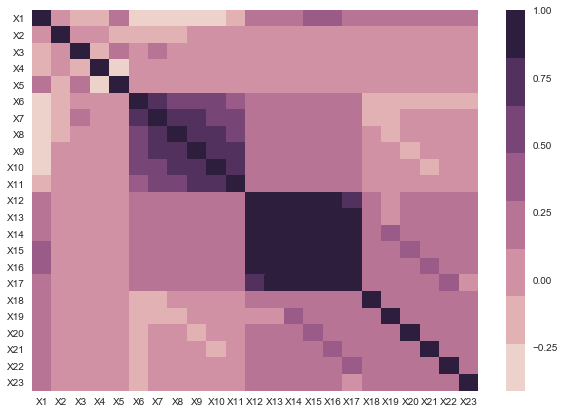

In [41]:
current_palette = sns.color_palette(sns.cubehelix_palette(8))
plt.figure(figsize=(10,7))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=current_palette)

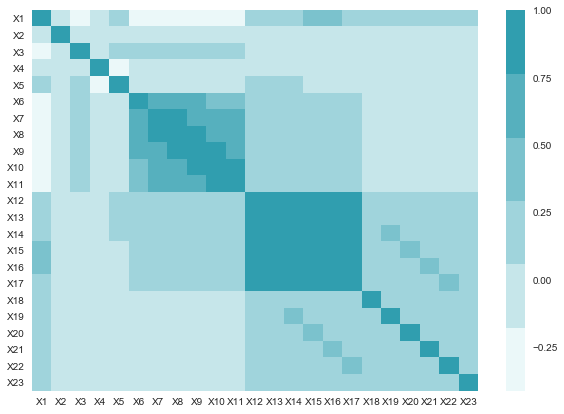

In [42]:
current_palette = sns.color_palette(sns.light_palette((210, 90, 60), input="husl"))
plt.figure(figsize=(10,7))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap=current_palette)

In [26]:
corr = x_standardize.corr()
#corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1,0.035,-0.23,-0.11,0.15,-0.27,-0.29,-0.29,-0.26,-0.25,-0.23,0.29,0.28,0.29,0.3,0.3,0.29,0.21,0.19,0.22,0.21,0.22,0.23
X2,0.035,1,0.017,-0.036,-0.099,-0.062,-0.072,-0.071,-0.059,-0.058,-0.046,-0.027,-0.026,-0.02,-0.013,-0.011,-0.011,-0.0023,-0.006,-0.0046,0.0045,0.0031,-0.0043
X3,-0.23,0.017,1,-0.14,0.17,0.11,0.13,0.12,0.11,0.1,0.084,0.024,0.019,0.013,-0.0021,-0.0094,-0.0094,-0.037,-0.031,-0.041,-0.043,-0.041,-0.039
X4,-0.11,-0.036,-0.14,1,-0.41,0.013,0.02,0.028,0.027,0.033,0.032,-0.026,-0.028,-0.031,-0.029,-0.028,-0.024,-0.02,-0.018,-0.013,-0.016,-0.00056,-0.005
X5,0.15,-0.099,0.17,-0.41,1,-0.037,-0.053,-0.057,-0.051,-0.054,-0.046,0.061,0.059,0.059,0.056,0.053,0.054,0.031,0.027,0.038,0.024,0.031,0.021
X6,-0.27,-0.062,0.11,0.013,-0.037,1,0.67,0.57,0.53,0.5,0.47,0.18,0.18,0.17,0.17,0.18,0.17,-0.089,-0.078,-0.073,-0.066,-0.06,-0.063
X7,-0.29,-0.072,0.13,0.02,-0.053,0.67,1,0.77,0.66,0.62,0.57,0.23,0.23,0.22,0.22,0.22,0.22,-0.086,-0.067,-0.055,-0.049,-0.04,-0.039
X8,-0.29,-0.071,0.12,0.028,-0.057,0.57,0.77,1,0.78,0.69,0.63,0.2,0.23,0.22,0.22,0.22,0.22,0.00023,-0.07,-0.055,-0.049,-0.037,-0.042
X9,-0.26,-0.059,0.11,0.027,-0.051,0.53,0.66,0.78,1,0.82,0.72,0.2,0.22,0.24,0.25,0.24,0.24,-0.0094,0.0019,-0.066,-0.045,-0.035,-0.03
X10,-0.25,-0.058,0.1,0.033,-0.054,0.5,0.62,0.69,0.82,1,0.81,0.2,0.22,0.24,0.27,0.27,0.26,-0.0084,-0.0035,0.011,-0.06,-0.034,-0.028


In [27]:
import seaborn as sns 
corr = x_standardize.corr()
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1,0.035,-0.23,-0.11,0.15,-0.27,-0.29,-0.29,-0.26,-0.25,-0.23,0.29,0.28,0.29,0.3,0.3,0.29,0.21,0.19,0.22,0.21,0.22,0.23
X2,0.035,1,0.017,-0.036,-0.099,-0.062,-0.072,-0.071,-0.059,-0.058,-0.046,-0.027,-0.026,-0.02,-0.013,-0.011,-0.011,-0.0023,-0.006,-0.0046,0.0045,0.0031,-0.0043
X3,-0.23,0.017,1,-0.14,0.17,0.11,0.13,0.12,0.11,0.1,0.084,0.024,0.019,0.013,-0.0021,-0.0094,-0.0094,-0.037,-0.031,-0.041,-0.043,-0.041,-0.039
X4,-0.11,-0.036,-0.14,1,-0.41,0.013,0.02,0.028,0.027,0.033,0.032,-0.026,-0.028,-0.031,-0.029,-0.028,-0.024,-0.02,-0.018,-0.013,-0.016,-0.00056,-0.005
X5,0.15,-0.099,0.17,-0.41,1,-0.037,-0.053,-0.057,-0.051,-0.054,-0.046,0.061,0.059,0.059,0.056,0.053,0.054,0.031,0.027,0.038,0.024,0.031,0.021
X6,-0.27,-0.062,0.11,0.013,-0.037,1,0.67,0.57,0.53,0.5,0.47,0.18,0.18,0.17,0.17,0.18,0.17,-0.089,-0.078,-0.073,-0.066,-0.06,-0.063
X7,-0.29,-0.072,0.13,0.02,-0.053,0.67,1,0.77,0.66,0.62,0.57,0.23,0.23,0.22,0.22,0.22,0.22,-0.086,-0.067,-0.055,-0.049,-0.04,-0.039
X8,-0.29,-0.071,0.12,0.028,-0.057,0.57,0.77,1,0.78,0.69,0.63,0.2,0.23,0.22,0.22,0.22,0.22,0.00023,-0.07,-0.055,-0.049,-0.037,-0.042
X9,-0.26,-0.059,0.11,0.027,-0.051,0.53,0.66,0.78,1,0.82,0.72,0.2,0.22,0.24,0.25,0.24,0.24,-0.0094,0.0019,-0.066,-0.045,-0.035,-0.03
X10,-0.25,-0.058,0.1,0.033,-0.054,0.5,0.62,0.69,0.82,1,0.81,0.2,0.22,0.24,0.27,0.27,0.26,-0.0084,-0.0035,0.011,-0.06,-0.034,-0.028


In [28]:
corr.to_csv("corr_out.csv")

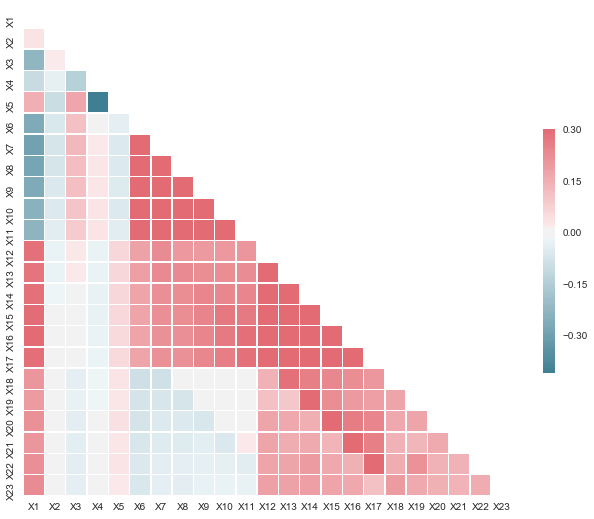

In [29]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = x_standardize.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

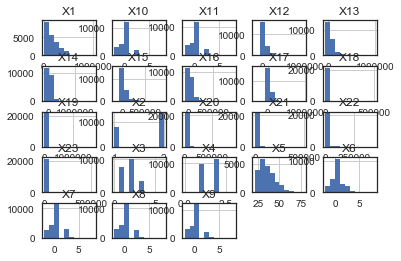

In [71]:
#Univariate Histograms
#x.hist()
#plt.show()

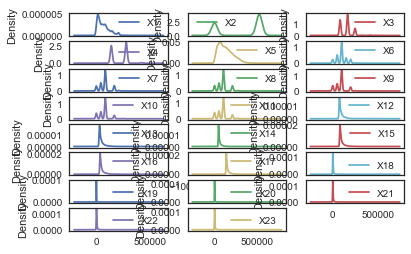

In [65]:
# Univariate Density Plots
#import matplotlib.pyplot as plt
x#.plot(kind='density', subplots=True, layout=(8,3), sharex=False)
#plt.show()

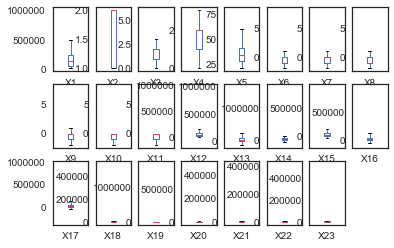

In [74]:
# Box and Whisker Plots
#x.plot(kind='box', subplots=True, layout=(3,8), sharex=False, sharey=False)
p#lt.show()

In [ ]:
#sns.pairplot(x)
p#lt.show()